# Explorative Data Analysis - Patients

In this notebook you find the explorative data analysis for the data of patients.
There is also diagnostic data of the patients, data of the used MRI machines and there is also laboratory data available.


## Imports and Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set default plt figsize to (12,6)
plt.rcParams["figure.figsize"] = (12,6)
pd.set_option('display.colheader_justify', 'center')


In [2]:
# runs the clean and preprocessing notebook
%run "clean_preprocessing.ipynb"

Start Clean and Preprocessing patients-data
End Clean and Preprocessing patient data
Start Clean and Preprocessing mri data
26 Cases were deleted, because they were same-day duplicates.
End Clean and Preprocessing mri data
Start Clean and Preprocessing lab-data
Sparsity of labordata: 0.263 % (nur von Fällen mit Laborwerten)
Von 302 Fällen gibt es keine Laborwerte.
End Clean and Preprocessing labor data


In [3]:
# runs the data_partitioning notebook
%run "data_partitioning.ipynb"

Start Data Partitioning
Total Patients Train set: 328
Total Patients Test set: 37
Label Distribution relative Difference between Train- and Testset:
 ± 0.89 %
Total Dataframe Train rows: 194
Total Dataframe Test rows: 24
Label Distribution relative Difference between Train- and Testset:
 ± 0.258 %
Total Dataframe Fold 1 rows: 39
Total Dataframe Fold 2 rows: 39
Total Dataframe Fold 3 rows: 39
Total Dataframe Fold 4 rows: 39
Total Dataframe Fold 5 rows: 38
Label Distribution relative Difference between Fold 0 vs. Fold 1:
 ± 0.051 %
Label Distribution relative Difference between Fold 0 vs. Fold 2:
 ± 0.051 %
Label Distribution relative Difference between Fold 0 vs. Fold 3:
 ± 0.051 %
Label Distribution relative Difference between Fold 0 vs. Fold 4:
 ± 0.012 %
Label Distribution relative Difference between Fold 1 vs. Fold 2:
 ± 0.0 %
Label Distribution relative Difference between Fold 1 vs. Fold 3:
 ± 0.0 %
Label Distribution relative Difference between Fold 1 vs. Fold 4:
 ± 0.039 %
Label 

In [4]:
# runs the imputation notebook
%run "imputation.ipynb"

Start Imputation Lab data
Sparsity of lab values of trainset before imputation, in percent is:
COR     17.525773
FSH     21.649485
FT4     10.824742
IGF1    13.402062
LH      22.164948
PROL     4.123711
TEST    46.391753
dtype: float64
Sparsity of lab values of testset before imputation, in percent is:
COR     25.000000
FSH     37.500000
FT4     12.500000
IGF1    37.500000
LH      37.500000
PROL    16.666667
TEST    79.166667
dtype: float64
Sparsity of lab values in trainset after imputation, in percent is:
COR     0.0
FSH     0.0
FT4     0.0
IGF1    0.0
LH      0.0
PROL    0.0
TEST    0.0
dtype: float64
Sparsity of lab values in testset after imputation, in percent is:
COR     0.0
FSH     0.0
FT4     0.0
IGF1    0.0
LH      0.0
PROL    0.0
TEST    0.0
dtype: float64
End Imputation Lab data


In [5]:
# read train data set
df = pd.read_csv(r'../data/train_data.csv')

In [6]:
# make datetime values
df["Date_Case"] = pd.to_datetime(df["Date_Case"])
df["Entry_date"] = pd.to_datetime(df["Entry_date"])
df["Operation_date"] = pd.to_datetime(df["Operation_date"])
# set category data type in pandas, check datatypes
df['ID_MRI_Machine'] = df['ID_MRI_Machine'].astype('category')
df['Adenoma_size'] = df['Adenoma_size'].astype('category')
df['Category'] = df['Category'].astype('category')
df['Patient_gender'] = df['Patient_gender'].astype('category')

## Dataframe Summary

In [7]:
df.head()

,Patient_ID,Category,Case_ID,Date_Case,ID_MRI_Machine,MRI_Case_ID,COR,FSH,FT4,IGF1,...,Pre_OP_hormone_somato,Pre_OP_hormone_adh,Pre_OP_hormone_hyperprolaktinstressbedingt,Pre_OP_hormone_cortico,Pre_OP_hormone_gonado,Pre_OP_hormone_thyreo,Pre_OP_hormone_hyperprolaktin,Operation_date,Entry_date,fold
0,300101347,non-prolaktinom,41147095,2021-03-08 14:50:00,MRI4,7896469,368.7775,5.8,13.90,19.50,...,0,0,0,0,0,0,0,NaT,2018-06-26,1
1,300109121,non-prolaktinom,40689394,2019-03-20 11:01:00,MRI3,7893637,352.6750,2.0,11.50,6.01,...,1,0,0,0,1,0,0,2019-03-25,2019-03-01,4
2,300165375,non-prolaktinom,40797582,2020-05-05 10:38:00,MRI3,8101174,453.5000,83.3,12.70,19.90,...,0,0,0,0,0,0,0,NaT,2019-10-01,3
3,300165375,non-prolaktinom,41521508,2022-03-17 15:51:00,MRI4,8631367,453.5000,83.3,12.70,19.90,...,0,0,0,0,0,0,0,NaT,2019-10-01,0
4,770245,non-prolaktinom,40467111,2018-09-18 09:53:00,MRI3,7726226,594.0000,3.7,9.18,24.00,...,0,0,0,0,0,0,0,2021-02-10,2018-09-18,1


In [8]:
df.tail()

,Patient_ID,Category,Case_ID,Date_Case,ID_MRI_Machine,MRI_Case_ID,COR,FSH,FT4,IGF1,...,Pre_OP_hormone_somato,Pre_OP_hormone_adh,Pre_OP_hormone_hyperprolaktinstressbedingt,Pre_OP_hormone_cortico,Pre_OP_hormone_gonado,Pre_OP_hormone_thyreo,Pre_OP_hormone_hyperprolaktin,Operation_date,Entry_date,fold
189,676748,non-prolaktinom,41323328,2021-10-14 11:14:00,MRI1,8497919,407.724,5.50,10.6,3.580,...,1,0,0,0,0,0,0,NaT,2012-12-01,3
190,300044383,prolaktinom,40421368,2018-04-30 18:07:00,MRI1,7695702,316.744,2.30,11.0,44.000,...,0,0,0,0,1,0,0,NaT,2016-12-01,3
191,354462,non-prolaktinom,41152867,2021-02-21 14:35:00,MRI3,8354280,550.000,20.65,9.3,14.279,...,1,0,0,1,1,1,0,2021-02-25,2021-02-01,2
192,300005160,non-prolaktinom,41124680,2021-02-22 14:10:00,MRI2,8347681,349.736,9.20,12.2,22.000,...,0,0,0,0,0,0,0,NaT,2018-02-01,4
193,300005160,non-prolaktinom,41684113,2023-01-09 14:36:00,MRI1,8853857,349.736,9.20,12.2,22.000,...,0,0,0,0,0,0,0,NaT,2018-02-01,3


In [9]:
print("Total Dataframe rows:", len(df))
print("Total Dataframe columns:", len(df.columns))
label_col = 'Category'
non_prol_n = len(df[df[label_col] == 'non-prolaktinom'])
prol_n = len(df[df[label_col] == 'prolaktinom'])
print("Dataframe rows with prolatinom label:", prol_n)
print("Dataframe rows with non-prolatinom label:", non_prol_n)

Total Dataframe rows: 194
Total Dataframe columns: 28
Dataframe rows with prolatinom label: 48
Dataframe rows with non-prolatinom label: 146


## Distribution Analysis
we will take a look at the distributions of the variables and check for outliers as well.

### Data of MRI
First we will take a look at the distribution of the data for the MRI which were done. 

In [10]:
column = 'Date_Case'
print("Range of Case dates:", df[column].min().strftime('%d.%m.%Y'), "to", df[column].max().strftime('%d.%m.%Y'))
print("Missing values:", sum(df[column].isna()))

Range of Case dates: 07.02.2018 to 11.04.2023
Missing values: 0


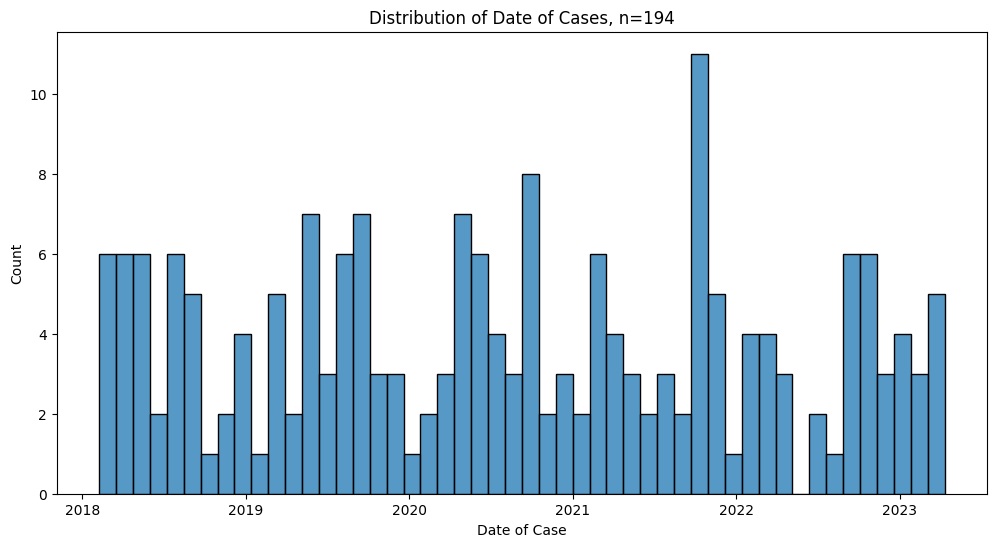

In [11]:
sns.histplot(df[column],bins=50)
plt.title(f"Distribution of Date of Cases, n={len(df[column])}")
plt.xlabel('Date of Case')
plt.show()

### Data of MRI Machines

We will analyse the distribution of the used MRI Machines. As there setup  is the same they will not have a big influence in the classification.


In [12]:
column= 'ID_MRI_Machine'
print("Unique MRI Machines:", df[column].unique())
print("Missing values:", sum(df[column].isna()))

Unique MRI Machines: ['MRI4', 'MRI3', 'MRI1', 'MRSZ', 'MRI2']
Categories (5, object): ['MRI1', 'MRI2', 'MRI3', 'MRI4', 'MRSZ']
Missing values: 0


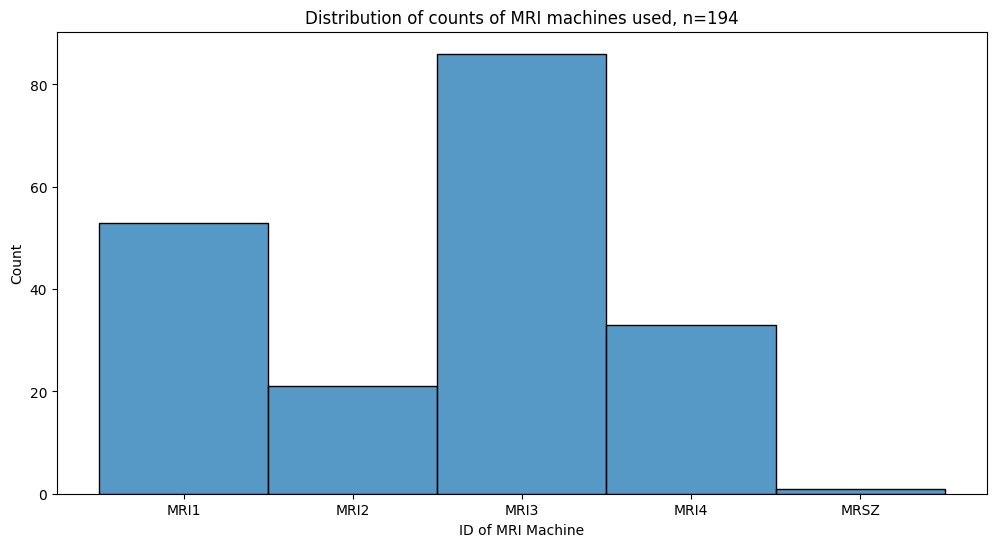

In [13]:
sns.histplot(df[column])
plt.title(f"Distribution of counts of MRI machines used, n={len(df[column])}")
plt.xlabel('ID of MRI Machine')
plt.show()

### Data Features (screening data)

#### Adenoma Size
The column for the 'Adenoma_size' describes if an Adenoma was labeled as micro or macro.
Micro is defined as <10mm and a macro is defined as >= 10 mm in size.

In [14]:
column= 'Adenoma_size'
print(f"Summary Statistics:\n{df[column].describe()}")
print(f"Percentage Distribution:\n{df[column].value_counts(normalize=True) * 100}")
print(f"Missing values Adenoma size:{sum(df[column].isna())}")

Summary Statistics:
count       180
unique        4
top       mikro
freq        109
Name: Adenoma_size, dtype: object
Percentage Distribution:
Adenoma_size
mikro     60.555556
makro     37.222222
giant      1.111111
normal     1.111111
Name: proportion, dtype: float64
Missing values Adenoma size:14


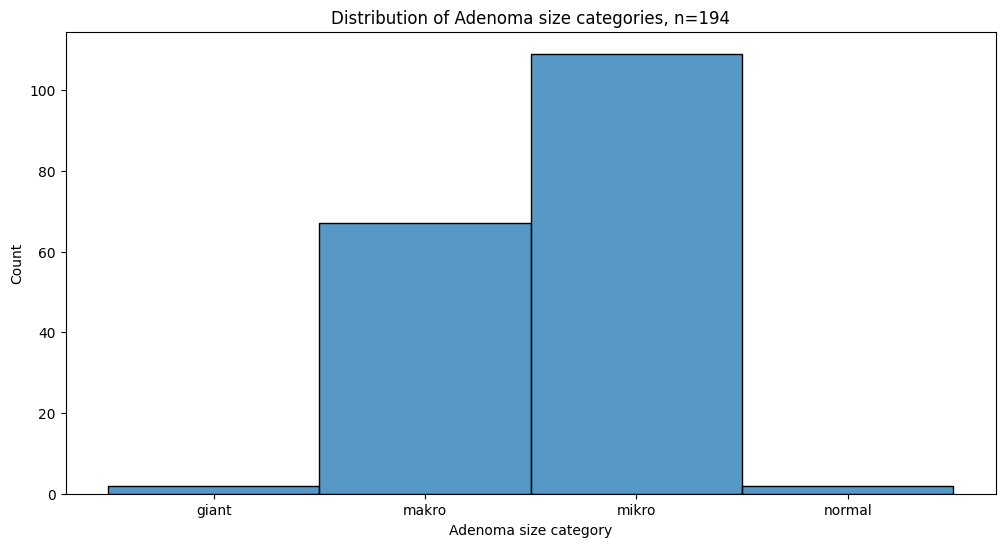

In [15]:
sns.histplot(df[column])
plt.title(f"Distribution of Adenoma size categories, n={len(df[column])}")
plt.xlabel('Adenoma size category')
plt.show()

#### Pre Operation hormonal disfunctions
The column for the 'Ausfälle prä' describes if a patient was experiencing an under- or an overproduction of a type of hormone (produced by the pituitary gland) before an operation.
Values which indicate a prolaktinoma are an overproduction of prolactin (hyperprolaktin).


In [16]:
# define all "pre op" columns
pre_op_columns = [col for col in df.columns if "Pre_" in col]

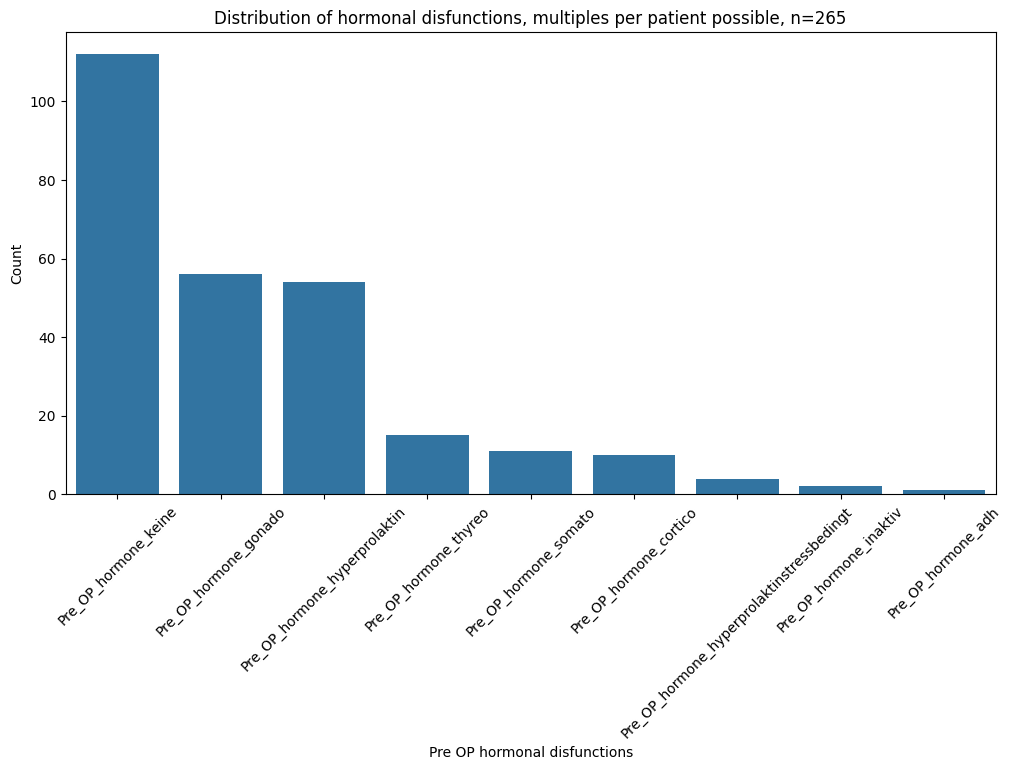

In [17]:
# summarise and sort the pre op column values
summary=df[pre_op_columns].sum().sort_values(ascending=False)
sns.barplot(x=summary.index, y=summary.values)
plt.title(f"Distribution of hormonal disfunctions, multiples per patient possible, n={sum(summary)}")
plt.xlabel("Pre OP hormonal disfunctions")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

#### Date of Entry and Operation
The columns for the 'Eintrittsdatum' and 'Operationdatum' describe when a patient entered the hospital and also when the operation took place.
The difference between these values can show the significance or the extraordinary need for an operation.

In [18]:
column = 'Entry_date'
print("Range of Entry date:", df[column].min().strftime('%d.%m.%Y'), "to", df[column].max().strftime('%d.%m.%Y'))
print("Missing values:", sum(df[column].isna()))

Range of Entry date: 01.01.1992 to 01.09.2023
Missing values: 0


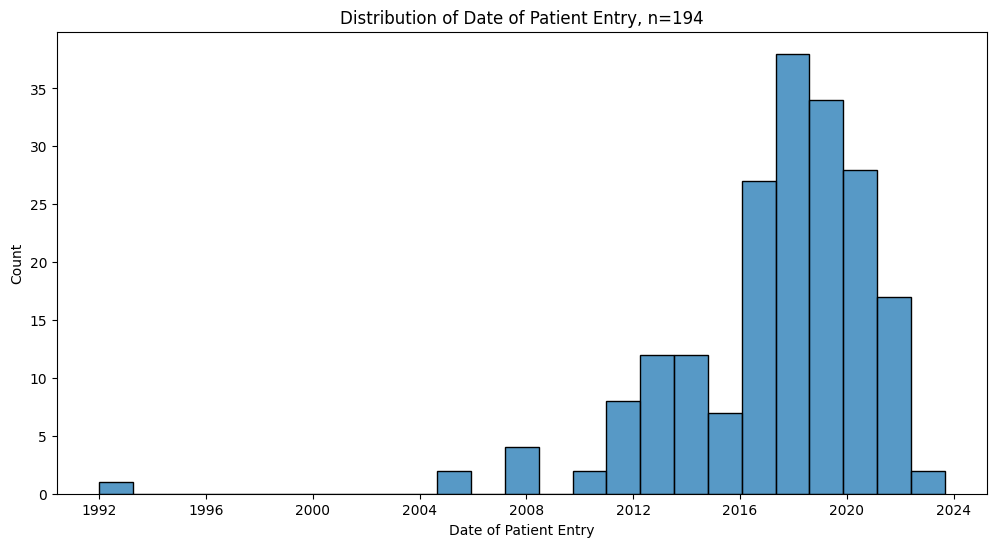

In [19]:
sns.histplot(df[column])
plt.title(f"Distribution of Date of Patient Entry, n={len(df[column])}")
plt.xlabel('Date of Patient Entry')
plt.show()

In [20]:
column = 'Operation_date'
print("Range of Operation date:", df[column].min().strftime('%d.%m.%Y'), "to", df[column].max().strftime('%d.%m.%Y'))
print("Missing values:", sum(df[column].isna()))

Range of Operation date: 18.03.2018 to 14.09.2023
Missing values: 162


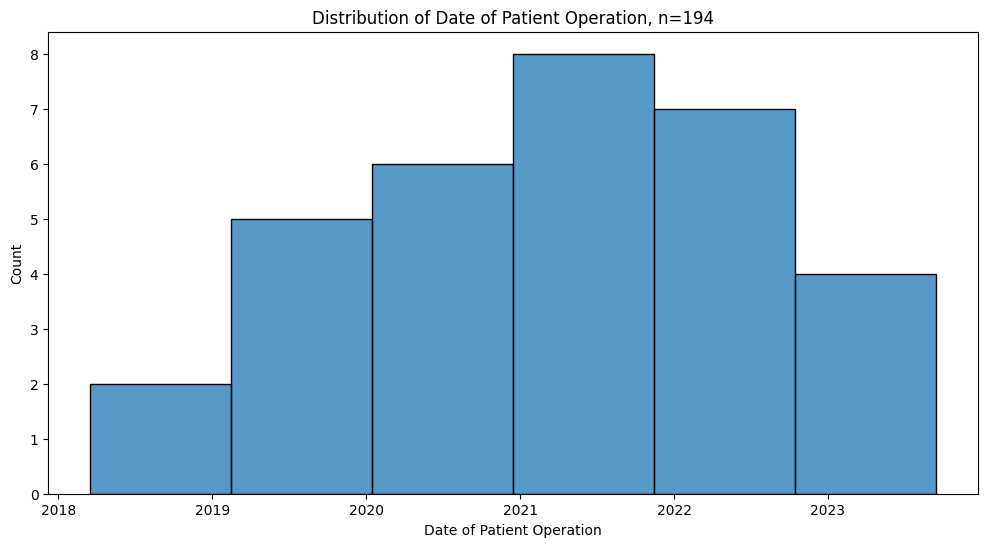

In [21]:
sns.histplot(df[column])
plt.title(f"Distribution of Date of Patient Operation, n={len(df[column])}")
plt.xlabel('Date of Patient Operation')
plt.show()

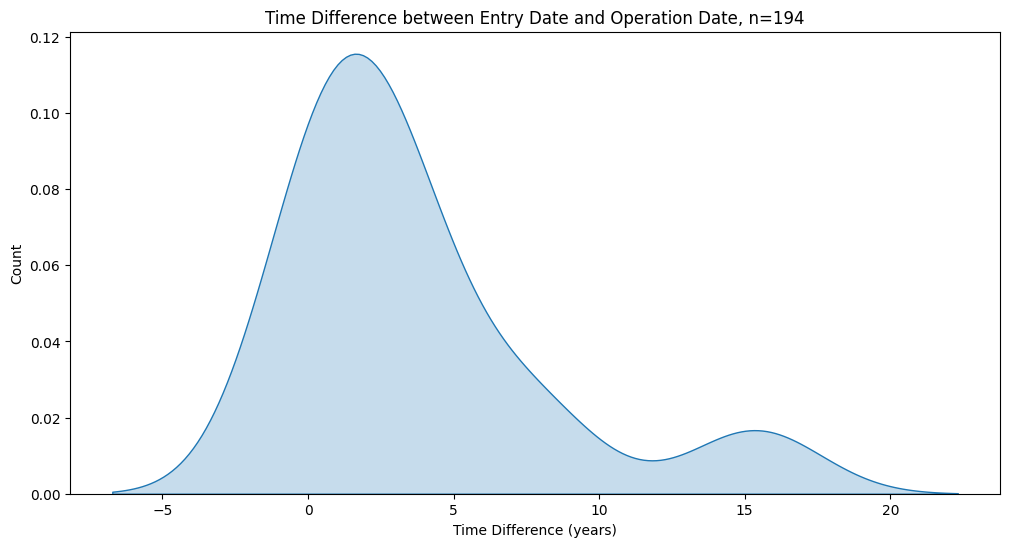

In [22]:
# calculate time difference in years between operation and entry date
df['EDDate_OPDate_Difference'] = (df['Operation_date'] - df['Entry_date']).dt.days /365
# Create a histogram to visualize the time differences
sns.kdeplot(df['EDDate_OPDate_Difference'], fill=True)
plt.title(f"Time Difference between Entry Date and Operation Date, n={len(df[column])}")
plt.xlabel("Time Difference (years)")
plt.ylabel("Count")
plt.show()

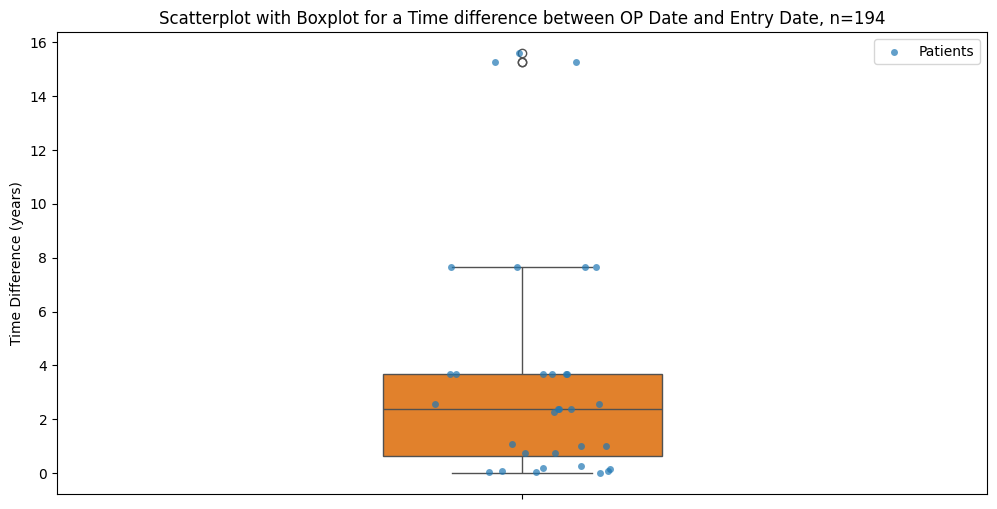

In [23]:
sns.stripplot(y=df['EDDate_OPDate_Difference'], jitter=True, legend=False,alpha=0.7,label="Patients")
sns.boxplot(y=df['EDDate_OPDate_Difference'], width=0.3)
plt.title(f"Scatterplot with Boxplot for a Time difference between OP Date and Entry Date, n={len(df[column])}")
plt.ylabel("Time Difference (years)")
plt.show()

#### Patient gender
The Patients gender is in the data set. It might be needed to impute certain missing values of hormone levels.

Summary Statistics Patient Gender:
 count        194
unique         2
top       female
freq         104
Name: Patient_gender, dtype: object
Missing values: 0


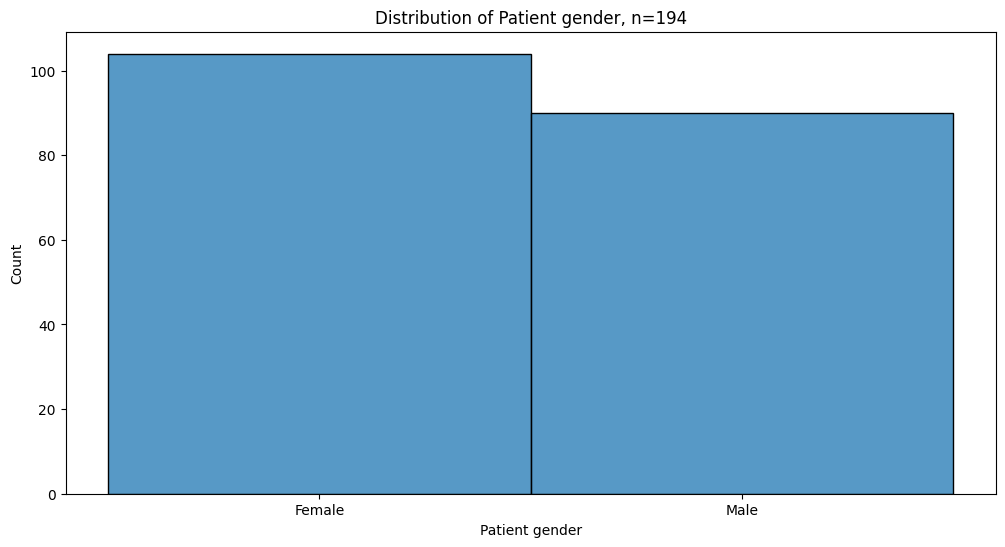

In [24]:
column = 'Patient_gender'
print("Summary Statistics Patient Gender:\n", df[column].describe())
print("Missing values:", sum(df[column].isna()))
sns.histplot(df[column],bins=30)
plt.title(f"Distribution of Patient gender, n={len(df[column])}")
plt.xlabel('Patient gender')
plt.xticks([0, 1], ['Female', 'Male'])  # Replace 0 and 1 with Female and Male
plt.show()

#### Patient Age
The Patients age is also the data set. It might be needed to impute certain missing values of hormone levels.


Range of ages: 17 to 84
Mean Patient Age: 51.134020618556704
Median Patient Age: 50.0
Missing values Patient Age: 0


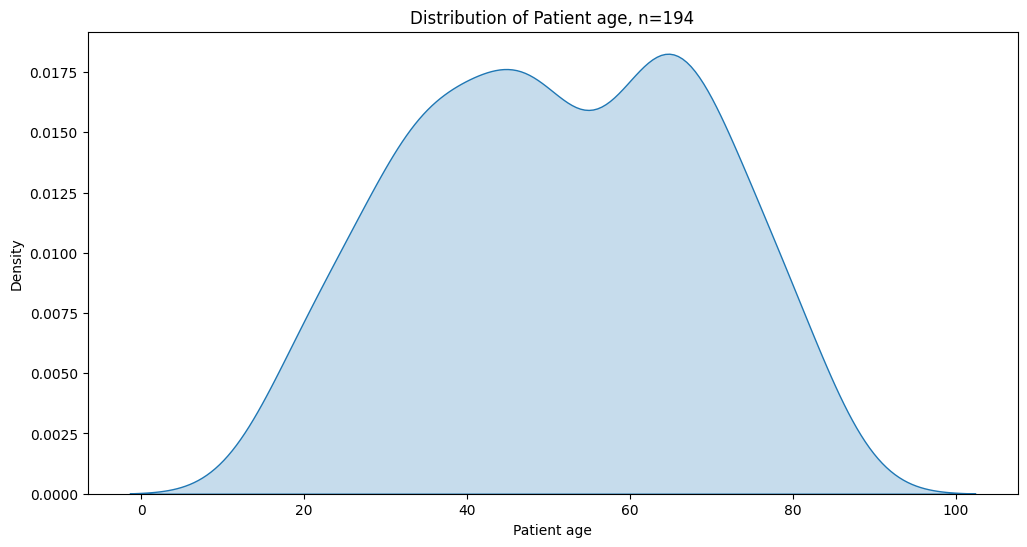

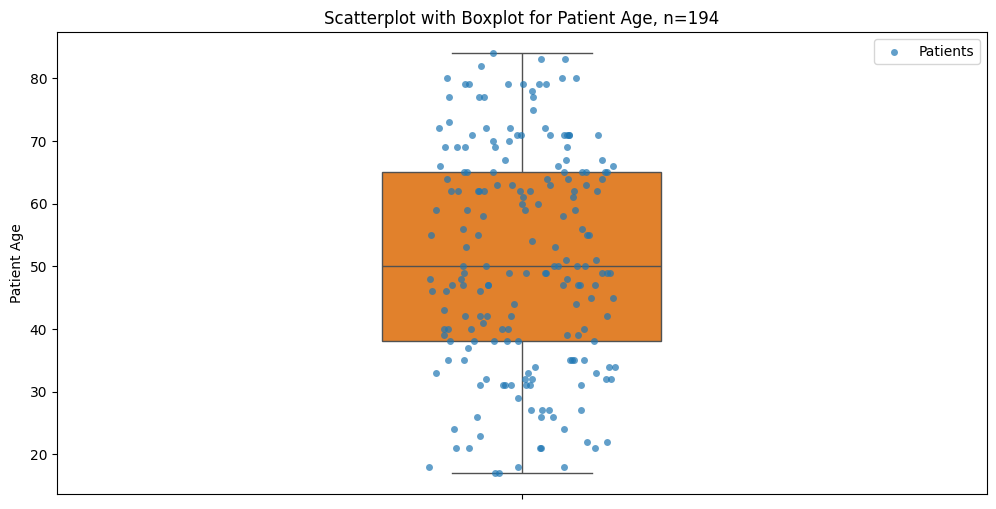

In [25]:
column = 'Patient_age'
print("Range of ages:", df[column].min(), "to", df[column].max())
print("Mean Patient Age:", df[column].mean())
print("Median Patient Age:", df[column].median())
print("Missing values Patient Age:", sum(df[column].isna()))
sns.kdeplot(df[column], fill=True)
plt.title(f"Distribution of Patient age, n={len(df[column])}")
plt.xlabel('Patient age')
plt.show()
sns.stripplot(y=df[column], jitter=True, legend=False,alpha=0.7,label="Patients")
sns.boxplot(y=df[column], width=0.3)
plt.title(f"Scatterplot with Boxplot for Patient Age, n={len(df[column])}")
plt.ylabel("Patient Age")
plt.legend()
plt.show()

### Data Laboratory Data (hormonal data)

Some Patients are missing lab values because they were transferred from external facilities like Kantonsspital Baden (KSB).
If the data was found by the labelers, we can include it in the models.

#### Prolactin (hormone)
The Column 'Prolactin' contains the measured values of prolactin for the patient.


Range of Prolactin: 0.2 to 1000.0
Mean Prolactin: 52.11045949926361
Median Prolactin: 12.649999999999999
Missing values: 0


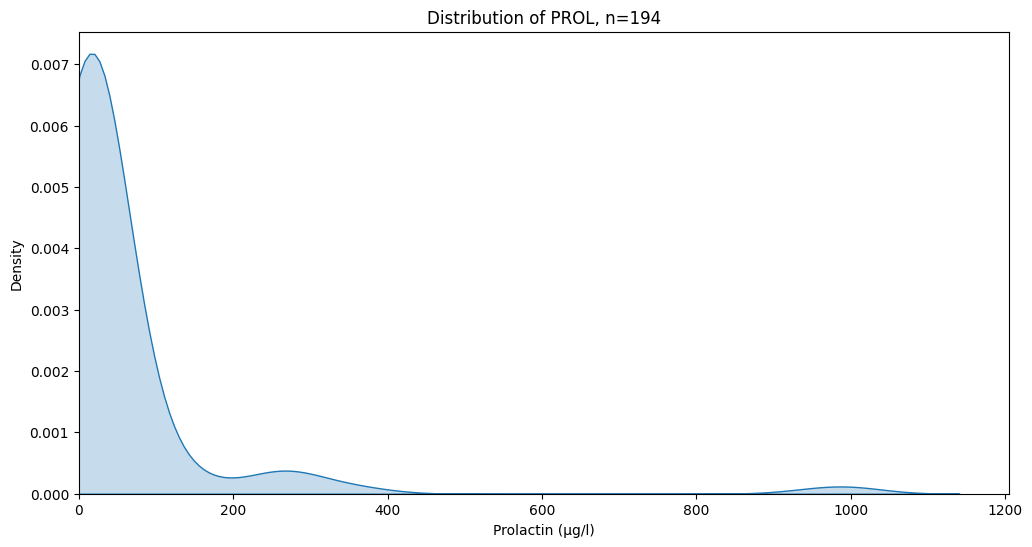

In [26]:
column = 'PROL'
label_col = 'Category'
print("Range of Prolactin:", df[column].min(), "to", df[column].max())
print("Mean Prolactin:", df[column].mean())
print("Median Prolactin:", df[column].median())
print("Missing values:", sum(df[column].isna()))
sns.kdeplot(df[column], fill=True)
plt.title(f"Distribution of {column}, n={len(df[column])}")
plt.xlabel('Prolactin (μg/l)')
plt.xlim(0, None)
plt.show()

Range of Prolactin for 'prolaktinom': 0.2 to 1000.0
Mean Prolactin for 'prolaktinom': 106.63570833333334
Median Prolactin for 'prolaktinom': 17.049999999999997
Missing values for 'prolaktinom': 0


Range of Prolactin for 'non-prolaktinom': 0.89 to 292.9
Mean Prolactin for 'non-prolaktinom': 34.18435029354207
Median Prolactin for 'non-prolaktinom': 12.3
Missing values for 'non-prolaktinom': 0


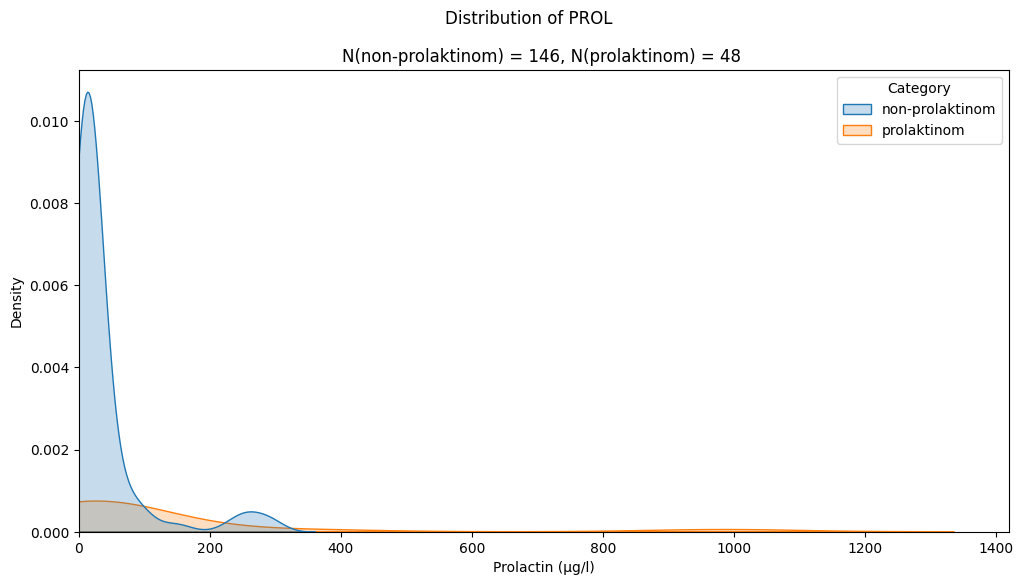

In [27]:
print("Range of Prolactin for 'prolaktinom':", df[df[label_col] == 'prolaktinom'][column].min(), "to", df[df[label_col] == 'prolaktinom'][column].max())
print("Mean Prolactin for 'prolaktinom':", df[df[label_col] == 'prolaktinom'][column].mean())
print("Median Prolactin for 'prolaktinom':", df[df[label_col] == 'prolaktinom'][column].median())
print("Missing values for 'prolaktinom':", sum(df[df[label_col] == 'prolaktinom'][column].isna()))
print('\n')
print("Range of Prolactin for 'non-prolaktinom':", df[df[label_col] == 'non-prolaktinom'][column].min(), "to", df[df[label_col] == 'non-prolaktinom'][column].max())
print("Mean Prolactin for 'non-prolaktinom':", df[df[label_col] == 'non-prolaktinom'][column].mean())
print("Median Prolactin for 'non-prolaktinom':", df[df[label_col] == 'non-prolaktinom'][column].median())
print("Missing values for 'non-prolaktinom':", sum(df[df[label_col] == 'non-prolaktinom'][column].isna()))
sns.kdeplot(df,x=column,hue=label_col,fill=True,)
plt.title(f"N(non-prolaktinom) = {non_prol_n}, N(prolaktinom) = {prol_n} ")
plt.suptitle(f'Distribution of {column}')
plt.xlabel('Prolactin (μg/l)')
plt.xlim(0, None)
plt.show()

#### Cortisol
The Column 'COR' contains the measured values of Cortisol for the patient.


Range of Cortisol: 0.324 to 1380.0
Mean Cortisol: 483.60033086807107
Median Cortisol: 506.0
Missing values Cortisol: 0


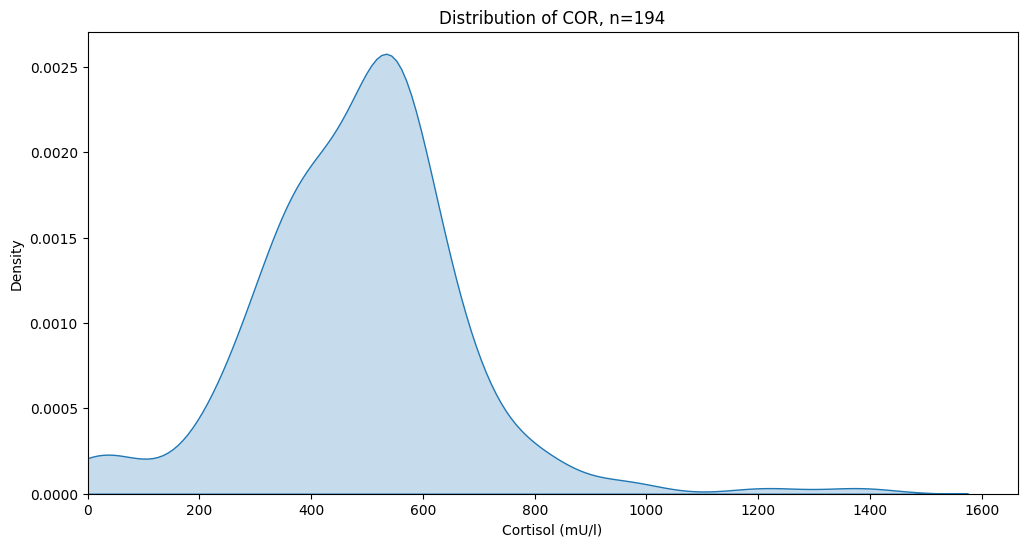

In [28]:
column = 'COR'
print("Range of Cortisol:", df[column].min(), "to", df[column].max())
print("Mean Cortisol:", df[column].mean())
print("Median Cortisol:", df[column].median())
print("Missing values Cortisol:", sum(df[column].isna()))
sns.kdeplot(df[column],fill=True)
plt.title(f"Distribution of {column}, n={len(df[column])}")
plt.xlabel('Cortisol (mU/l)')
plt.xlim(0, None)
plt.show()

Range of Cortisol for 'prolaktinom': 0.423 to 1380.0
Mean Cortisol for 'prolaktinom': 507.3341805555556
Median Cortisol for 'prolaktinom': 550.0
Missing values Cortisol for 'prolaktinom': 0


Range of Cortisol for 'non-prolaktinom': 0.324 to 962.0
Mean Cortisol for 'non-prolaktinom': 475.7974213817748
Median Cortisol for 'non-prolaktinom': 496.0955
Missing values Cortisol for 'non-prolaktinom': 0


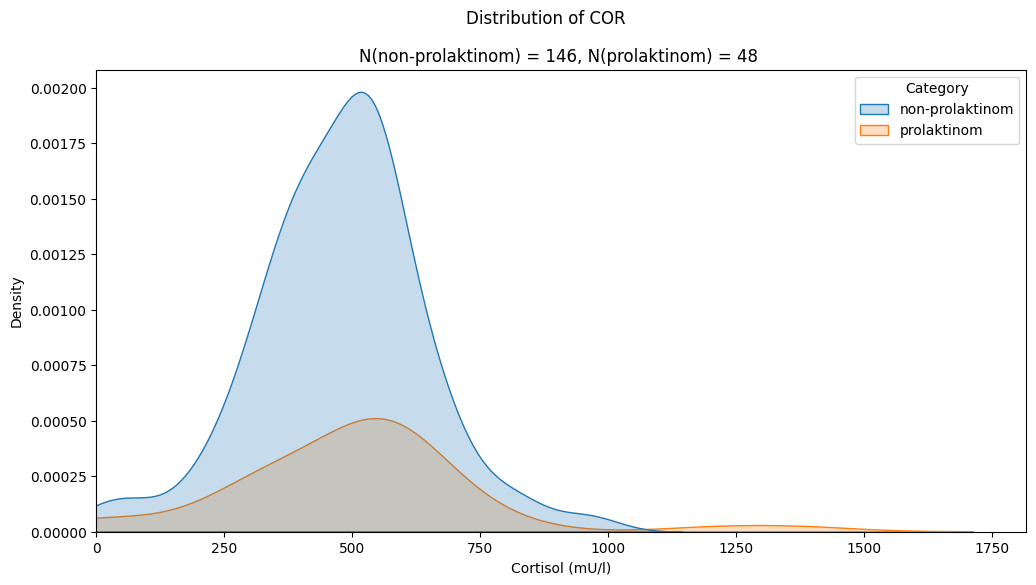

In [29]:
print("Range of Cortisol for 'prolaktinom':", df[df[label_col] == 'prolaktinom'][column].min(), "to", df[df[label_col] == 'prolaktinom'][column].max())
print("Mean Cortisol for 'prolaktinom':", df[df[label_col] == 'prolaktinom'][column].mean())
print("Median Cortisol for 'prolaktinom':", df[df[label_col] == 'prolaktinom'][column].median())
print("Missing values Cortisol for 'prolaktinom':", sum(df[df[label_col] == 'prolaktinom'][column].isna()))
print('\n')
print("Range of Cortisol for 'non-prolaktinom':", df[df[label_col] == 'non-prolaktinom'][column].min(), "to", df[df[label_col] == 'non-prolaktinom'][column].max())
print("Mean Cortisol for 'non-prolaktinom':", df[df[label_col] == 'non-prolaktinom'][column].mean())
print("Median Cortisol for 'non-prolaktinom':", df[df[label_col] == 'non-prolaktinom'][column].median())
print("Missing values Cortisol for 'non-prolaktinom':", sum(df[df[label_col] == 'non-prolaktinom'][column].isna()))

sns.kdeplot(df,x=column,hue=label_col,fill=True,)
plt.title(f"N(non-prolaktinom) = {non_prol_n}, N(prolaktinom) = {prol_n} ")
plt.suptitle(f'Distribution of {column}')
plt.xlabel('Cortisol (mU/l)')
plt.xlim(0, None)
plt.show()

#### IGF1 (hormone)
The Column 'IGF1' contains the measured values of Insulin-like growth factor 1 for the patient.


Range of IGF1: 3.53 to 119.0
Mean IGF1: 21.4476030927835
Median IGF1: 19.0
Missing values: 0


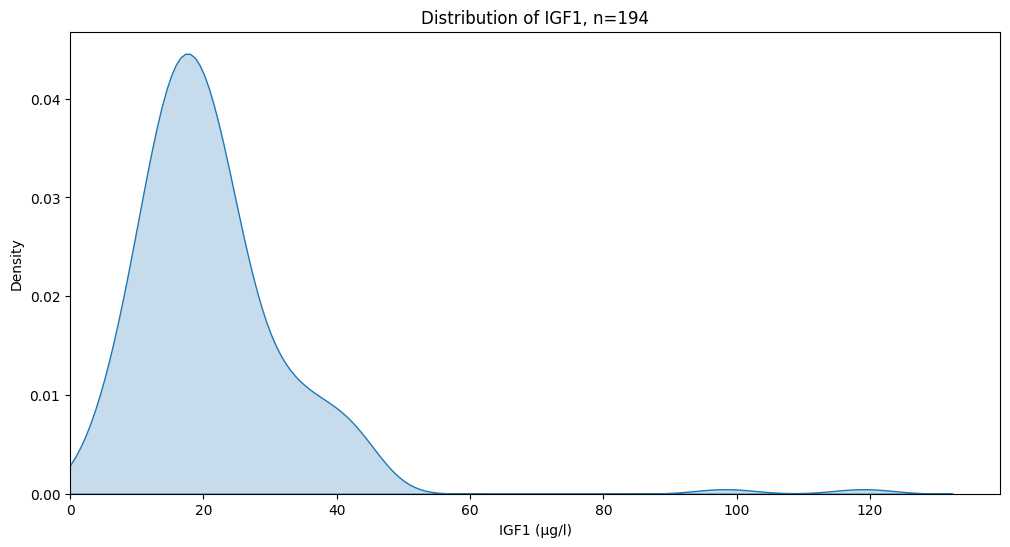

In [30]:
column = 'IGF1'
print("Range of IGF1:", df[column].min(), "to", df[column].max())
print("Mean IGF1:", df[column].mean())
print("Median IGF1:", df[column].median())
print("Missing values:", sum(df[column].isna()))
sns.kdeplot(df[column],fill=True,)
plt.title(f"Distribution of {column}, n={len(df[column])}")
plt.xlabel('IGF1 (μg/l)')
plt.xlim(0, None)
plt.show()

Range of IGF1 for 'prolaktinom': 11.4 to 44.0
Mean IGF1 for 'prolaktinom': 22.108437499999997
Median IGF1 for 'prolaktinom': 22.3005
Missing values IGF1 for 'prolaktinom': 0


Range of IGF1 for 'non-prolaktinom': 3.53 to 119.0
Mean IGF1 for 'non-prolaktinom': 21.230342465753424
Median IGF1 for 'non-prolaktinom': 17.700000000000003
Missing values IGF1 for 'non-prolaktinom': 0


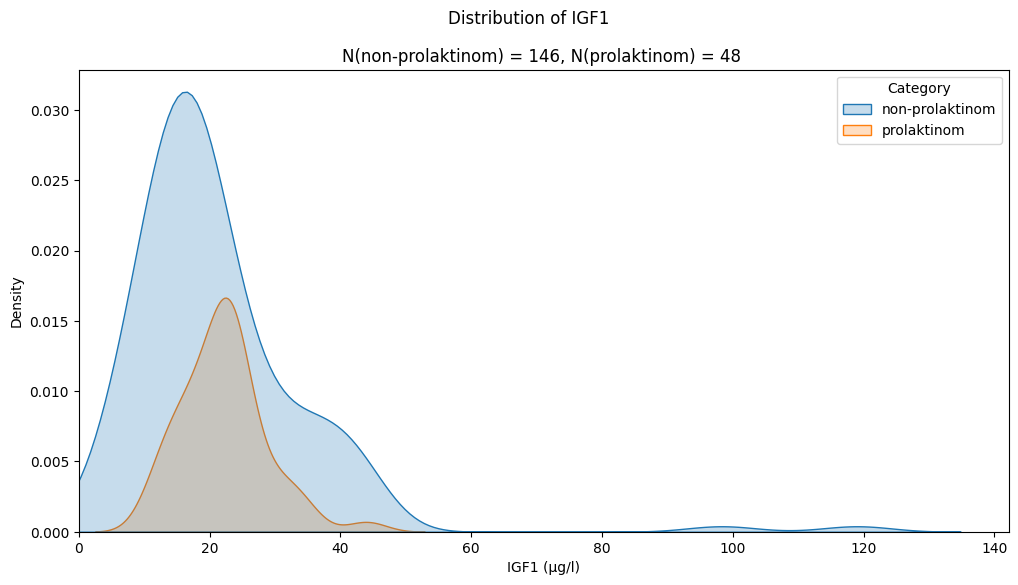

In [31]:
print("Range of IGF1 for 'prolaktinom':", df[df[label_col] == 'prolaktinom'][column].min(), "to", df[df[label_col] == 'prolaktinom'][column].max())
print("Mean IGF1 for 'prolaktinom':", df[df[label_col] == 'prolaktinom'][column].mean())
print("Median IGF1 for 'prolaktinom':", df[df[label_col] == 'prolaktinom'][column].median())
print("Missing values IGF1 for 'prolaktinom':", sum(df[df[label_col] == 'prolaktinom'][column].isna()))
print('\n')
print("Range of IGF1 for 'non-prolaktinom':", df[df[label_col] == 'non-prolaktinom'][column].min(), "to", df[df[label_col] == 'non-prolaktinom'][column].max())
print("Mean IGF1 for 'non-prolaktinom':", df[df[label_col] == 'non-prolaktinom'][column].mean())
print("Median IGF1 for 'non-prolaktinom':", df[df[label_col] == 'non-prolaktinom'][column].median())
print("Missing values IGF1 for 'non-prolaktinom':", sum(df[df[label_col] == 'non-prolaktinom'][column].isna()))

sns.kdeplot(df,x=column,hue=label_col,fill=True,)
plt.title(f"N(non-prolaktinom) = {non_prol_n}, N(prolaktinom) = {prol_n} ")
plt.suptitle(f'Distribution of {column}')
plt.xlabel('IGF1 (μg/l)')
plt.xlim(0, None)
plt.show()

#### FT4 (hormone)
The Column 'FT4' contains the measured values of Thyroxine free hormone for the patient.


Range of FT4: 3.6 to 23.3
Mean FT4: 12.889310927835052
Median FT4: 12.4
Missing values: 0


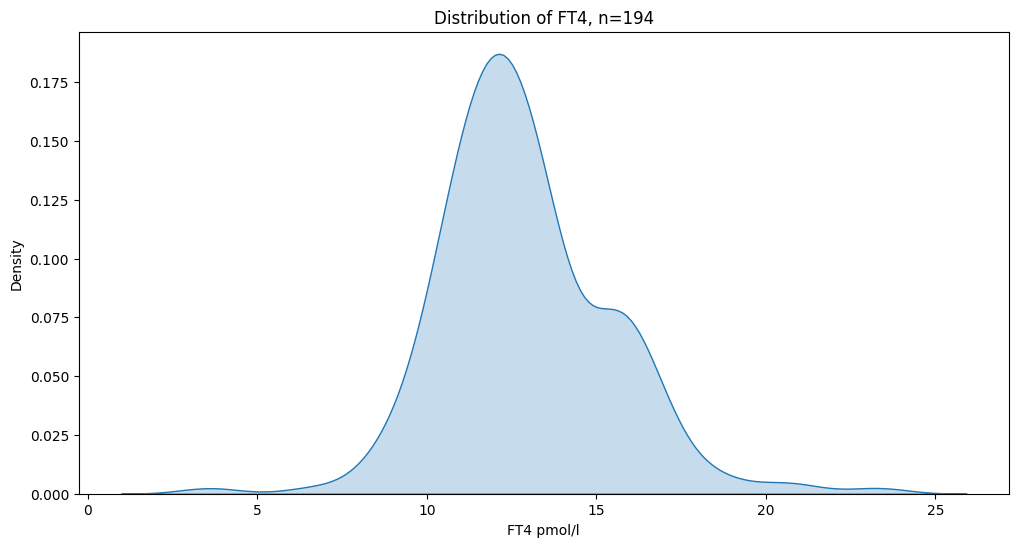

In [32]:
column = 'FT4'
print("Range of FT4:", df[column].min(), "to", df[column].max())
print("Mean FT4:", df[column].mean())
print("Median FT4:", df[column].median())
print("Missing values:", sum(df[column].isna()))
sns.kdeplot(df[column],fill=True,)
plt.title(f"Distribution of {column}, n={len(df[column])}")
plt.xlabel('FT4 pmol/l')
plt.show()

Range of FT4 for 'prolaktinom': 8.79 to 18.8
Mean FT4 for 'prolaktinom': 13.107736041666668
Median FT4 for 'prolaktinom': 12.5
Missing values FT4 for 'prolaktinom': 0


Range of FT4 for 'non-prolaktinom': 3.6 to 23.3
Mean FT4 for 'non-prolaktinom': 12.817499931506852
Median FT4 for 'non-prolaktinom': 12.4
Missing values FT4 for 'non-prolaktinom': 0


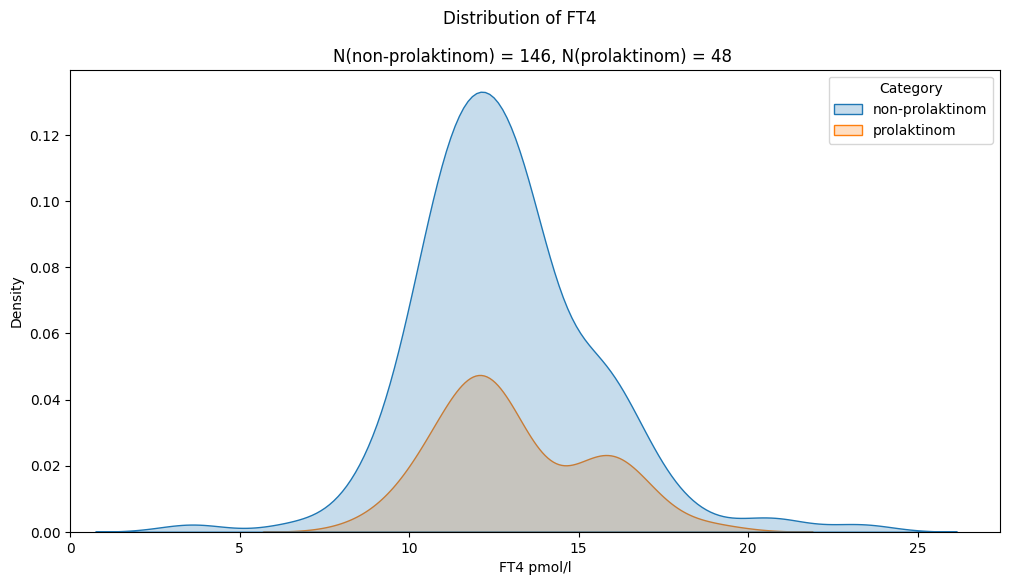

In [33]:
print("Range of FT4 for 'prolaktinom':", df[df[label_col] == 'prolaktinom'][column].min(), "to", df[df[label_col] == 'prolaktinom'][column].max())
print("Mean FT4 for 'prolaktinom':", df[df[label_col] == 'prolaktinom'][column].mean())
print("Median FT4 for 'prolaktinom':", df[df[label_col] == 'prolaktinom'][column].median())
print("Missing values FT4 for 'prolaktinom':", sum(df[df[label_col] == 'prolaktinom'][column].isna()))
print('\n')
print("Range of FT4 for 'non-prolaktinom':", df[df[label_col] == 'non-prolaktinom'][column].min(), "to", df[df[label_col] == 'non-prolaktinom'][column].max())
print("Mean FT4 for 'non-prolaktinom':", df[df[label_col] == 'non-prolaktinom'][column].mean())
print("Median FT4 for 'non-prolaktinom':", df[df[label_col] == 'non-prolaktinom'][column].median())
print("Missing values FT4 for 'non-prolaktinom':", sum(df[df[label_col] == 'non-prolaktinom'][column].isna()))
sns.kdeplot(df,x=column,hue=label_col,fill=True,)
plt.title(f"N(non-prolaktinom) = {non_prol_n}, N(prolaktinom) = {prol_n} ")
plt.suptitle(f'Distribution of {column}')
plt.xlabel('FT4 pmol/l')
plt.xlim(0, None)
plt.show()


#### Testosteron (hormone)
The Column 'Testosteron' contains the measured values of Testosteron for the patient.


Range of Testosteron: 0.15 to 36.7
Mean Testosteron: 6.5791752577319595
Median Testosteron: 1.08
Missing values: 0


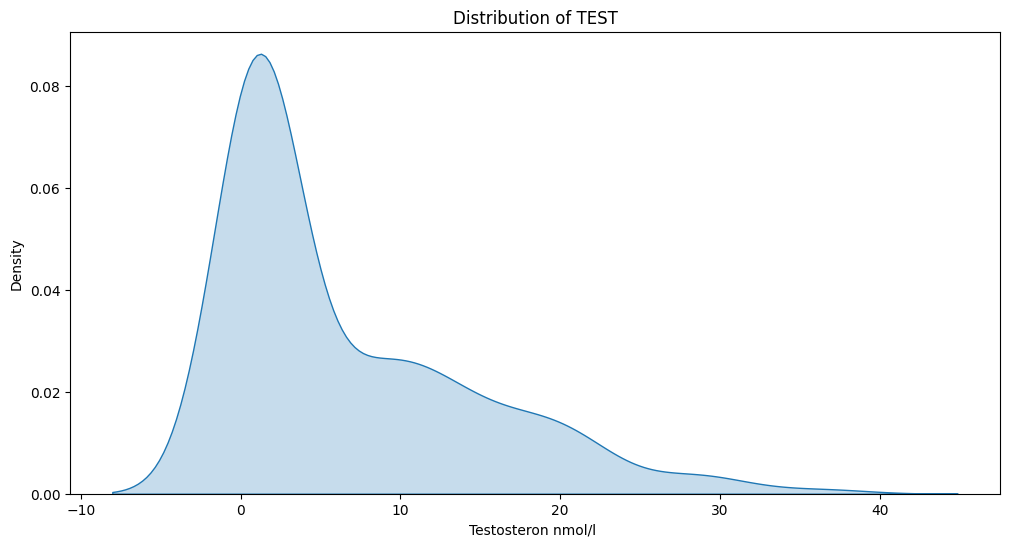

In [34]:
column = 'TEST'
print("Range of Testosteron:", df[column].min(), "to", df[column].max())
print("Mean Testosteron:", df[column].mean())
print("Median Testosteron:", df[column].median())
print("Missing values:", sum(df[column].isna()))
sns.kdeplot(df[column],fill=True,)
plt.title(f"Distribution of {column}")
plt.xlabel('Testosteron nmol/l ')
plt.show()

Range of Testosteron for 'prolaktinom': 0.72 to 28.8
Mean Testosteron for 'prolaktinom': 8.965625000000001
Median Testosteron for 'prolaktinom': 3.775
Missing values Testosteron for 'prolaktinom': 0


Range of Testosteron for 'non-prolaktinom': 0.15 to 36.7
Mean Testosteron for 'non-prolaktinom': 5.7945890410958905
Median Testosteron for 'non-prolaktinom': 1.08
Missing values Testosteron for 'non-prolaktinom': 0


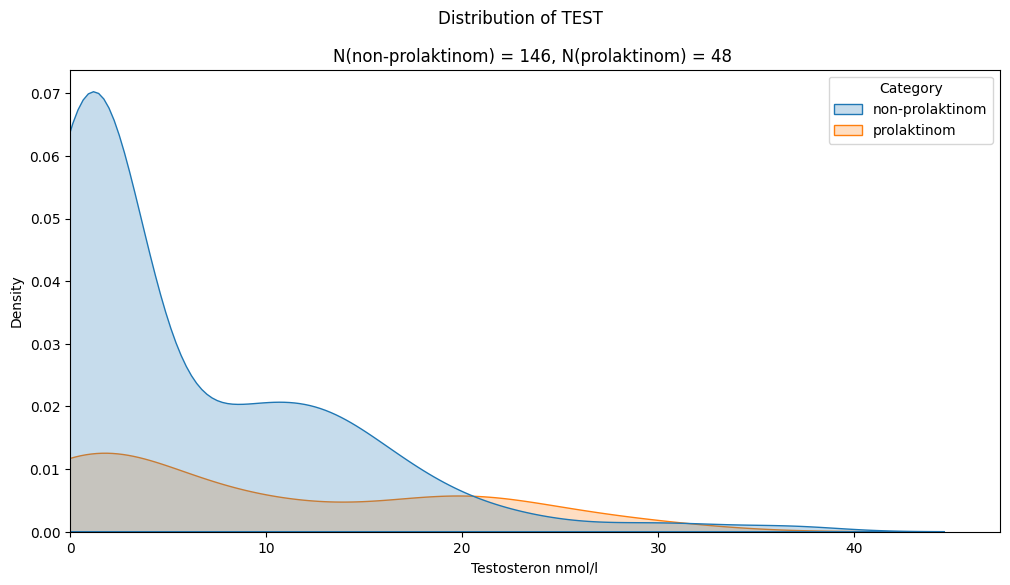

In [35]:
print("Range of Testosteron for 'prolaktinom':", df[df[label_col] == 'prolaktinom'][column].min(), "to", df[df[label_col] == 'prolaktinom'][column].max())
print("Mean Testosteron for 'prolaktinom':", df[df[label_col] == 'prolaktinom'][column].mean())
print("Median Testosteron for 'prolaktinom':", df[df[label_col] == 'prolaktinom'][column].median())
print("Missing values Testosteron for 'prolaktinom':", sum(df[df[label_col] == 'prolaktinom'][column].isna()))
print('\n')
print("Range of Testosteron for 'non-prolaktinom':", df[df[label_col] == 'non-prolaktinom'][column].min(), "to", df[df[label_col] == 'non-prolaktinom'][column].max())
print("Mean Testosteron for 'non-prolaktinom':", df[df[label_col] == 'non-prolaktinom'][column].mean())
print("Median Testosteron for 'non-prolaktinom':", df[df[label_col] == 'non-prolaktinom'][column].median())
print("Missing values Testosteron for 'non-prolaktinom':", sum(df[df[label_col] == 'non-prolaktinom'][column].isna()))
sns.kdeplot(df,x=column,hue=label_col,fill=True,)
plt.title(f"N(non-prolaktinom) = {non_prol_n}, N(prolaktinom) = {prol_n} ")
plt.suptitle(f'Distribution of {column}')
plt.xlabel('Testosteron nmol/l')
plt.xlim(0, None)
plt.show()

#### LH (hormone)
The Column 'LH' contains the measured values of Luteinizing Hormone for the patient.


Range of LH: 0.2 to 55.4
Mean LH: 8.79409793814433
Median LH: 4.4
Missing values: 0


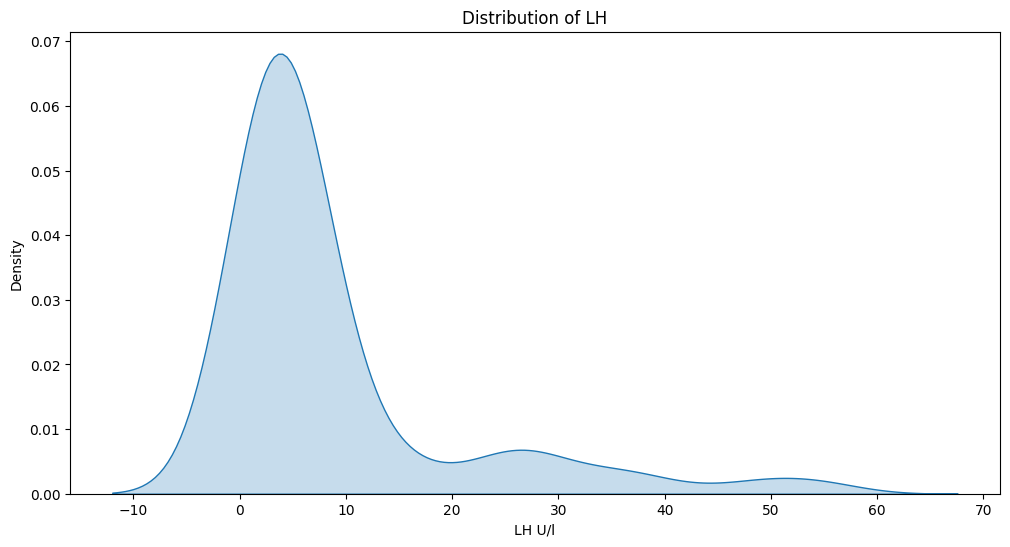

In [36]:
column = 'LH'
print("Range of LH:", df[column].min(), "to", df[column].max())
print("Mean LH:", df[column].mean())
print("Median LH:", df[column].median())
print("Missing values:", sum(df[column].isna()))
sns.kdeplot(df[column],fill=True,)
plt.title(f"Distribution of {column}")
plt.xlabel('LH U/l')
plt.show()

Range of LH for 'prolaktinom': 0.2 to 9.5
Mean LH for 'prolaktinom': 3.8903125
Median LH for 'prolaktinom': 3.2
Missing values LH for 'prolaktinom': 0


Range of LH for 'non-prolaktinom': 0.2 to 55.4
Mean LH for 'non-prolaktinom': 10.406301369863014
Median LH for 'non-prolaktinom': 5.2
Missing values LH for 'non-prolaktinom': 0


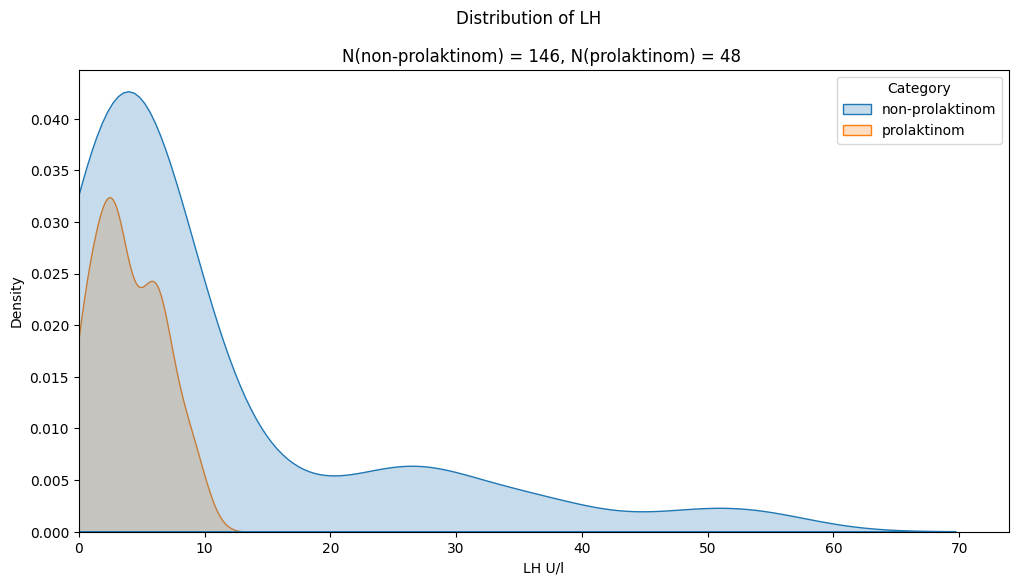

In [37]:
print("Range of LH for 'prolaktinom':", df[df[label_col] == 'prolaktinom'][column].min(), "to", df[df[label_col] == 'prolaktinom'][column].max())
print("Mean LH for 'prolaktinom':", df[df[label_col] == 'prolaktinom'][column].mean())
print("Median LH for 'prolaktinom':", df[df[label_col] == 'prolaktinom'][column].median())
print("Missing values LH for 'prolaktinom':", sum(df[df[label_col] == 'prolaktinom'][column].isna()))
print('\n')
print("Range of LH for 'non-prolaktinom':", df[df[label_col] == 'non-prolaktinom'][column].min(), "to", df[df[label_col] == 'non-prolaktinom'][column].max())
print("Mean LH for 'non-prolaktinom':", df[df[label_col] == 'non-prolaktinom'][column].mean())
print("Median LH for 'non-prolaktinom':", df[df[label_col] == 'non-prolaktinom'][column].median())
print("Missing values LH for 'non-prolaktinom':", sum(df[df[label_col] == 'non-prolaktinom'][column].isna()))
sns.kdeplot(df,x=column,hue=label_col,fill=True,)
plt.title(f"N(non-prolaktinom) = {non_prol_n}, N(prolaktinom) = {prol_n} ")
plt.suptitle(f'Distribution of {column}')
plt.xlabel('LH U/l')
plt.xlim(0, None)
plt.show()

#### FSH (hormone)
The Column 'FSH' contains the measured values of Follicle-stimulating hormone  for the patient.


Range of FSH: 0.2 to 111.0
Mean FSH: 16.697422680412373
Median FSH: 5.5
Missing values: 0


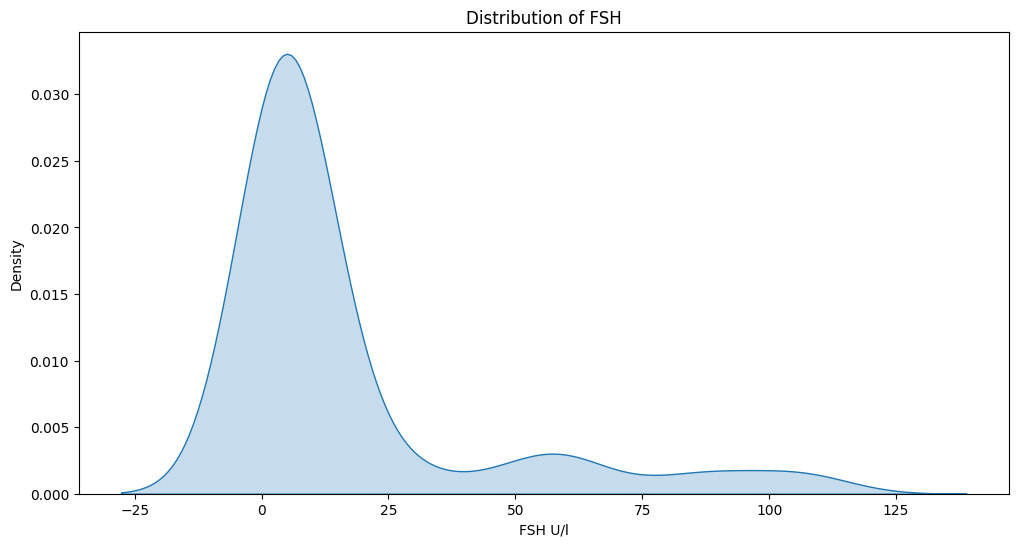

In [38]:
column = 'FSH'
print("Range of FSH:", df[column].min(), "to", df[column].max())
print("Mean FSH:", df[column].mean())
print("Median FSH:", df[column].median())
print("Missing values:", sum(df[column].isna()))
sns.kdeplot(df[column],fill=True,)
plt.title(f"Distribution of {column}")
plt.xlabel('FSH U/l')
plt.show()

Range of FSH for 'prolaktinom': 0.2 to 16.0
Mean FSH for 'prolaktinom': 4.6468750000000005
Median FSH for 'prolaktinom': 4.4
Missing values FSH for 'prolaktinom': 0


Range of FSH for 'non-prolaktinom': 0.2 to 111.0
Mean FSH for 'non-prolaktinom': 20.659246575342465
Median FSH for 'non-prolaktinom': 5.8
Missing values FSH for 'non-prolaktinom': 0


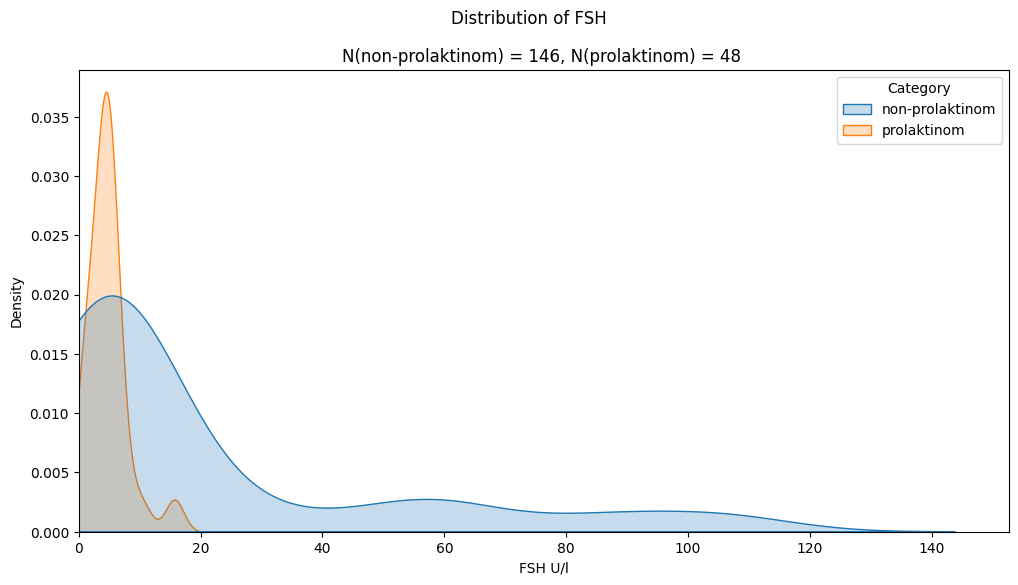

In [39]:
print("Range of FSH for 'prolaktinom':", df[df[label_col] == 'prolaktinom'][column].min(), "to", df[df[label_col] == 'prolaktinom'][column].max())
print("Mean FSH for 'prolaktinom':", df[df[label_col] == 'prolaktinom'][column].mean())
print("Median FSH for 'prolaktinom':", df[df[label_col] == 'prolaktinom'][column].median())
print("Missing values FSH for 'prolaktinom':", sum(df[df[label_col] == 'prolaktinom'][column].isna()))
print('\n')
print("Range of FSH for 'non-prolaktinom':", df[df[label_col] == 'non-prolaktinom'][column].min(), "to", df[df[label_col] == 'non-prolaktinom'][column].max())
print("Mean FSH for 'non-prolaktinom':", df[df[label_col] == 'non-prolaktinom'][column].mean())
print("Median FSH for 'non-prolaktinom':", df[df[label_col] == 'non-prolaktinom'][column].median())
print("Missing values FSH for 'non-prolaktinom':", sum(df[df[label_col] == 'non-prolaktinom'][column].isna()))
sns.kdeplot(df,x=column,hue=label_col,fill=True,)
plt.title(f"N(non-prolaktinom) = {non_prol_n}, N(prolaktinom) = {prol_n} ")
plt.suptitle(f'Distribution of {column}')
plt.xlabel('FSH U/l')
plt.xlim(0, None)
plt.show()

### Data Labels (Medical diagnosis data)

#### Category Prolactinoma (binary Label)
The Column 'Category' contains the actual label data if a adenoma is a prolactinoma or a non-prolactinoma.


Summary Statistics:
 count                 194
unique                  2
top       non-prolaktinom
freq                  146
Name: Category, dtype: object
Percentage Distribution:
 Category
non-prolaktinom    75.257732
prolaktinom        24.742268
Name: proportion, dtype: float64
Missing values Adenoma category: 0


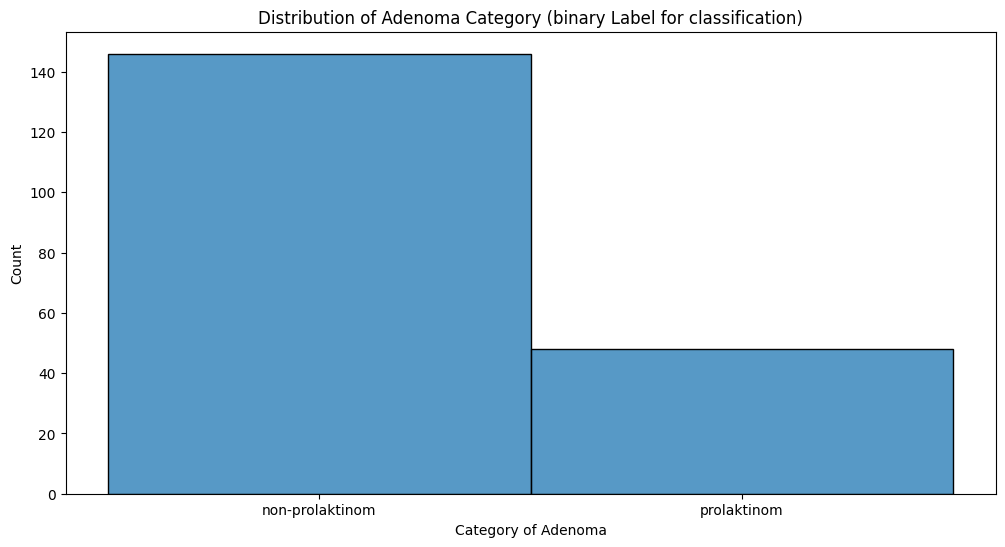

In [40]:
column = 'Category'
print("Summary Statistics:\n",df[column].describe())
print("Percentage Distribution:\n",df[column].value_counts(normalize=True) * 100)
print("Missing values Adenoma category:", sum(df[column].isna()))
sns.histplot(df[column])
plt.title(f"Distribution of Adenoma Category (binary Label for classification)")
plt.xlabel('Category of Adenoma')
plt.show()

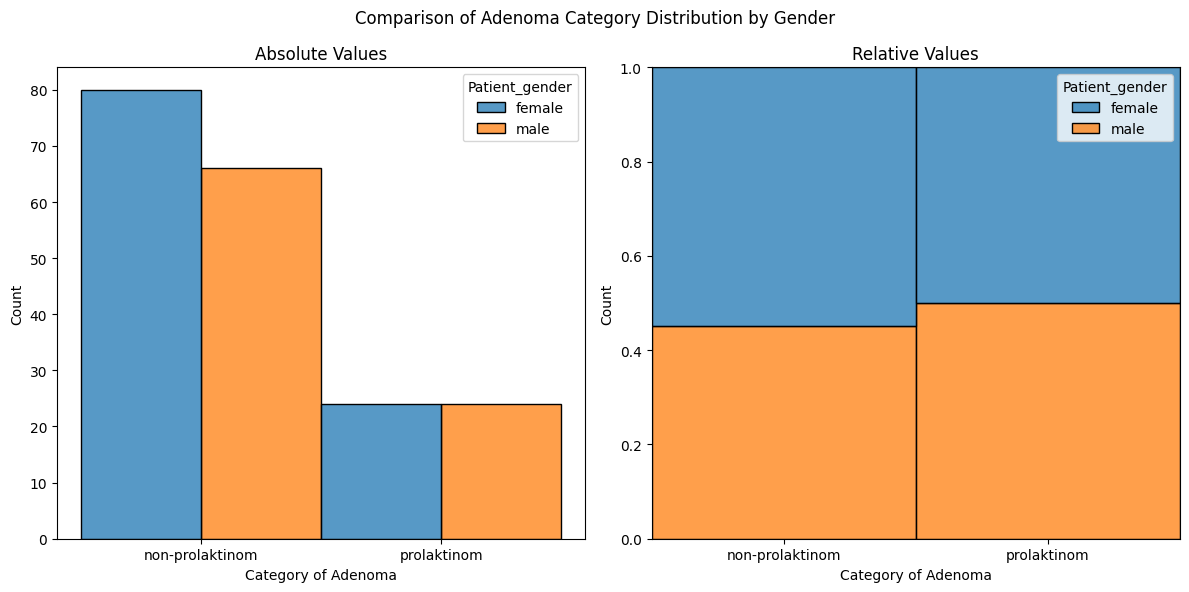

In [41]:
# Create a figure and axis (subplots)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First subplot: Dodge plot
sns.histplot(df, x='Category', hue='Patient_gender', multiple='dodge', ax=axes[0])

# Set the title and labels for the first subplot
axes[0].set_title("Absolute Values")
axes[0].set_xlabel('Category of Adenoma')

# Second subplot: Fill plot
sns.histplot(df, x='Category', hue='Patient_gender', multiple='fill', ax=axes[1])

# Set the title and labels for the second subplot
axes[1].set_title("Relative Values")
axes[1].set_xlabel('Category of Adenoma')

# Adjust layout for better spacing
fig.suptitle("Comparison of Adenoma Category Distribution by Gender")
plt.tight_layout()

# Show the plot
plt.show()


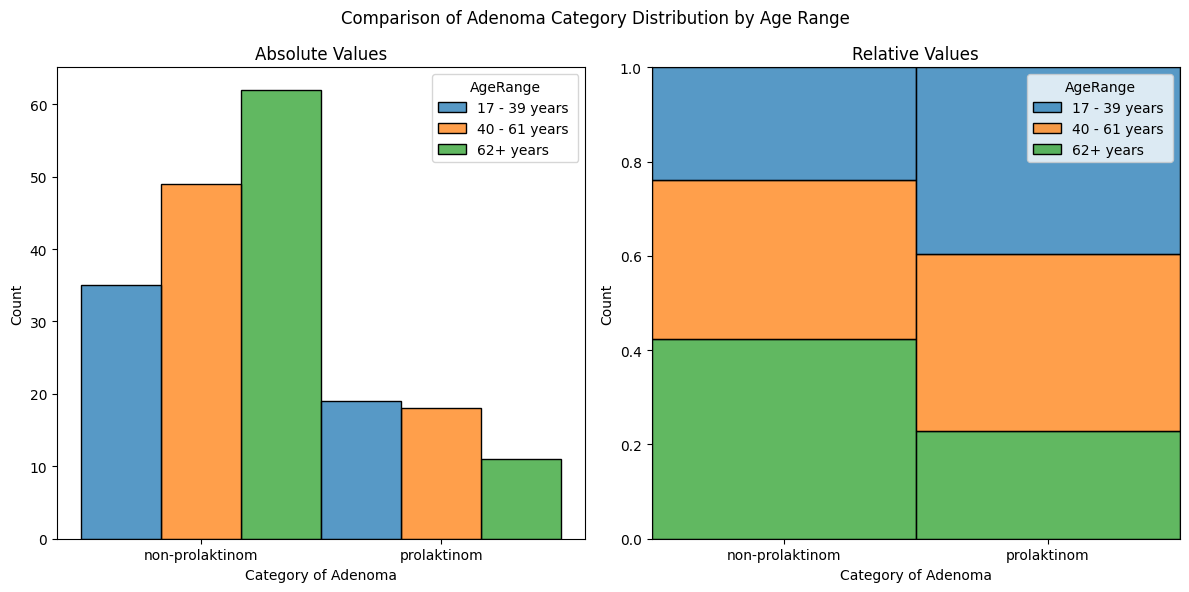

In [42]:
age_bins = [17,39,61, float('inf')]  # Define your age ranges
age_labels = ['17 - 39 years','40 - 61 years ','62+ years']  # Labels for the age ranges

# Create a new column 'AgeRange' in your DataFrame based on the age bins
df['AgeRange'] = pd.cut(df['Patient_age'], bins=age_bins, labels=age_labels, right=False)
# Create a figure and axis (subplots)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First subplot: Dodge plot
sns.histplot(df, x='Category', hue='AgeRange', multiple='dodge', ax=axes[0])

# Set the title and labels for the first subplot
axes[0].set_title("Absolute Values")
axes[0].set_xlabel('Category of Adenoma')

# Second subplot: Fill plot
sns.histplot(df, x='Category', hue='AgeRange', multiple='fill', ax=axes[1])

# Set the title and labels for the second subplot
axes[1].set_title("Relative Values")
axes[1].set_xlabel('Category of Adenoma')

# Adjust layout for better spacing
fig.suptitle("Comparison of Adenoma Category Distribution by Age Range")
plt.tight_layout()

# Show the plot
plt.show()


# Conclusion EDA
In summary, our exploration of the small dataset, consisting of approximately 200 observations with 9 features encompassing hormones, gender, and age, has provided valuable insights, while also revealing areas that warrant careful consideration in future research endeavors.

The small size of the dataset underscores the potential benefits of incorporating more features and observations to bolster the robustness of any predictive model, especially deep learning models. While the option of increasing observations exists by incorporating lab data without corresponding MRI results, this approach introduces a trade-off in data quality. Extracting more features from MRI images is an avenue for consideration but given our commitment to developing multimodal models that combine tabular lab features with MRI picture data we choose not to do it.

Examining feature distributions, we observed generally well-distributed patterns, with the highest sparsity (~45%) observed in the testosterone hormone. This sparsity is logically explained by the absence of testosterone testing in females. Addressing missing values appropriately is crucial to maintaining the integrity of our analyses.

Analyzing differences in hormone distributions associated with the target label, we identified notable associations. FSH and LH gender hormones exhibited lower values for prolactinoma cases, while the prolactin hormone displayed a wider distribution, notably higher in cases with prolactinoma. These distinctions, grounded in medical rationale, provide meaningful insights for feature selection in our tabular model development.

Furthermore, our analysis revealed intriguing patterns concerning patient age and gender in relation to the target label. Males demonstrated a slight (~5%) prevalence for prolactinomas. Additionally, age-related trends indicated a slight prevalence among younger individuals (17-39) and middle-aged individuals (40-61), while older individuals (62+) showed less prolactinomas, potentially indicating the occurrence of other types of brain tumors.

In conclusion, our exploratory analysis serves as a foundation for future investigations. The identified areas for improvement, such as the need for more features and observations, underscore the ongoing evolution of our research. Balancing data quality and quantity, understanding feature distributions, and recognizing medically significant associations will guide the development of more robust multimodal models in subsequent studies.




- small dataset (~200 observations and 9 features, 7 hormones and gender as well as age)
    - more features and more observations are probably needed
    - more observations might be possible if we decrease the dataquality by using lab data which does not correspond with an MRI, especially for deep learning models
    - more features could be extracted from MRI images but for the lab data we used all available features, we will not do it because we wanted to use multimodal models (tabular lab features and mri picture data)
- all features are distributed well, the highest sparsity value ~45% is in the testosteron hormone, this can be explained by the missing values for females which testosteron is not tested in the lab
- differences in label in distributions of hormones
    - FSH and LH gender hromones are associated with lower values for a prolactinoma, prolaktine hormone is much wider distributed (aka higher values) for cases with prolactinoma
    - both of these differences are medically explainable 
- some differences in patient age and gender for label
    - males have a little ~5% prevalence
    - younger people (17-39) have a little prevalence for a prolactinoma, middle aged (40-61) also have a little prevalence, older people (62+) might have other brain tumors